In [4]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_raw = pd.read_csv('data/Cykel_matningar_2023.csv', delimiter=';')
df_raw.sort_values(by='TotAllt', ascending=False).head()

MätplatsID                 Mätplatsnamn       Tidsstämpel       Datum  \
328564        6664   C 0402 Enskedevägen Västra  2023-03-10 13:00  2023-03-10   
428347        6680    C 0517 Västbergarondellen  2023-02-13 22:45  2023-02-13   
326945        6664   C 0402 Enskedevägen Västra  2023-02-21 16:15  2023-02-21   
426361        6680    C 0517 Västbergarondellen  2023-01-24 06:15  2023-01-24   
227553        6655  C 0509 Liljeholmsbron Östra  2023-05-23 08:15  2023-05-23   

         Tidsteg  R1AntalFordon  R1LättaFordon  R1TungaFordon  R1Okänd  \
328564  13:00:00            0.0            0.0            0.0      0.0   
428347  22:45:00            0.0            0.0            0.0      0.0   
326945  16:15:00            0.0            0.0            0.0      0.0   
426361  06:15:00            0.0            0.0            0.0      0.0   
227553  08:15:00            0.0            0.0            0.0      0.0   

        R1Medelhastighet  ...  R2MC  R2Cykel/MC  R2Gång  TotCykel  TotMC  \
328564               NaN  ...   0.0         0.0     0.0    1287.0    0.0   
428347               NaN  ...   0.0         0.0     0.0     917.0    0.0   
326945               NaN  ...   0.0         0.0     0.0     822.0    0.0   
426361               NaN  ...   0.0         0.0     0.0     707.0    0.0   
227553               NaN  ...   0.0         0.0     0.0     587.0    0.0   

        TotCykel/MC  TotGång  R1Allt  R2Allt  TotAllt  
328564          0.0      0.0  1286.0     1.0   1287.0  
428347          0.0      0.0     0.0   917.0    917.0  
326945          0.0      0.0   812.0    10.0    822.0  
426361          0.0      0.0    11.0   696.0    707.0  
227553          0.0      0.0   584.0     3.0    587.0  

[5 rows x 35 columns]

In [6]:
# Convert to datetime
df_raw['Datum'] = pd.to_datetime(df_raw['Datum'])
df_raw['Tidsstämpel'] = pd.to_datetime(df_raw['Tidsstämpel'])
df_raw.head()

MätplatsID         Mätplatsnamn         Tidsstämpel      Datum   Tidsteg  \
0        6265  C 0203 Roslagsvägen 2023-01-01 00:00:00 2023-01-01  00:00:00   
1        6265  C 0203 Roslagsvägen 2023-01-01 00:15:00 2023-01-01  00:15:00   
2        6265  C 0203 Roslagsvägen 2023-01-01 00:30:00 2023-01-01  00:30:00   
3        6265  C 0203 Roslagsvägen 2023-01-01 00:45:00 2023-01-01  00:45:00   
4        6265  C 0203 Roslagsvägen 2023-01-01 01:00:00 2023-01-01  01:00:00   

   R1AntalFordon  R1LättaFordon  R1TungaFordon  R1Okänd  R1Medelhastighet  \
0            0.0            0.0            0.0      0.0               NaN   
1            0.0            0.0            0.0      0.0               NaN   
2            0.0            0.0            0.0      0.0               NaN   
3            0.0            0.0            0.0      0.0               NaN   
4            0.0            0.0            0.0      0.0               NaN   

   ...  R2MC  R2Cykel/MC  R2Gång  TotCykel  TotMC  TotCykel/MC  TotGång  \
0  ...   0.0         0.0     0.0       0.0    0.0          0.0      0.0   
1  ...   0.0         0.0     0.0       0.0    0.0          0.0      0.0   
2  ...   0.0         0.0     0.0       0.0    0.0          0.0      0.0   
3  ...   0.0         0.0     0.0       2.0    0.0          0.0      0.0   
4  ...   0.0         0.0     0.0       0.0    0.0          0.0      0.0   

   R1Allt  R2Allt  TotAllt  
0     0.0     0.0      0.0  
1     0.0     0.0      0.0  
2     0.0     0.0      0.0  
3     0.0     2.0      2.0  
4     0.0     0.0      0.0  

[5 rows x 35 columns]

## Clean unnecessary columns

In [7]:
# Remove columns
cols = ['MätplatsID', 'Mätplatsnamn', 'Tidsstämpel','Datum', 'R1Cykel', 'R2Cykel', 'TotCykel', 'TotAllt']
df_cleaned = df_raw[cols] 
df_cleaned.sort_values(by='TotAllt', ascending=False).head(10)

MätplatsID                 Mätplatsnamn         Tidsstämpel  \
328564        6664   C 0402 Enskedevägen Västra 2023-03-10 13:00:00   
428347        6680    C 0517 Västbergarondellen 2023-02-13 22:45:00   
326945        6664   C 0402 Enskedevägen Västra 2023-02-21 16:15:00   
426361        6680    C 0517 Västbergarondellen 2023-01-24 06:15:00   
227553        6655  C 0509 Liljeholmsbron Östra 2023-05-23 08:15:00   
426367        6680    C 0517 Västbergarondellen 2023-01-24 07:45:00   
227552        6655  C 0509 Liljeholmsbron Östra 2023-05-23 08:00:00   
140865        6646          C 0306 Munkbroleden 2023-05-23 08:15:00   
396508        6672      C 0112 Sveavägen Västra 2023-05-15 07:00:00   
228224        6655  C 0509 Liljeholmsbron Östra 2023-05-30 08:00:00   

            Datum  R1Cykel  R2Cykel  TotCykel  TotAllt  
328564 2023-03-10   1286.0      1.0    1287.0   1287.0  
428347 2023-02-13      0.0    917.0     917.0    917.0  
326945 2023-02-21    812.0     10.0     822.0    822.0  
426361 2023-01-24     11.0    696.0     707.0    707.0  
227553 2023-05-23    584.0      3.0     587.0    587.0  
426367 2023-01-24     46.0    536.0     582.0    582.0  
227552 2023-05-23    569.0      6.0     575.0    575.0  
140865 2023-05-23    441.0    105.0     546.0    546.0  
396508 2023-05-15    540.0      4.0     544.0    544.0  
228224 2023-05-30    536.0      5.0     541.0    541.0

In [8]:
# Remove more columns
cols = ['Tidsstämpel','Datum', 'TotCykel']
df_cleaned = df_cleaned[cols] 
df_cleaned.sort_values(by='Datum', ascending=False)

Tidsstämpel      Datum  TotCykel
511103 2023-05-31 23:45:00 2023-05-31       1.0
127126 2023-05-31 05:30:00 2023-05-31      16.0
127128 2023-05-31 06:00:00 2023-05-31      17.0
127129 2023-05-31 06:15:00 2023-05-31      39.0
127130 2023-05-31 06:30:00 2023-05-31      48.0
...                    ...        ...       ...
228473 2023-01-01 22:15:00 2023-01-01       0.0
228472 2023-01-01 22:00:00 2023-01-01       1.0
228471 2023-01-01 21:45:00 2023-01-01       1.0
228470 2023-01-01 21:30:00 2023-01-01       1.0
0      2023-01-01 00:00:00 2023-01-01       0.0

[511104 rows x 3 columns]

## Sum passages per month

### Explore different ways to group and plot

In [9]:
# ts=df_sales.groupby(["date_block_num"])["item_cnt_day"].sum()

ts = df_cleaned.groupby([df_cleaned.Datum.dt.month])["TotCykel"].sum()
ts.head()


Datum
1     761828.0
2     737508.0
3     733069.0
4    1323503.0
5    1955335.0
Name: TotCykel, dtype: float64

In [10]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=ts.index, y=ts,
#                          name = 'Sales',
#                          line=dict(color='seagreen', width=5, dash='5px 10px 2px 2px')
#                          )
#              )

In [11]:
fig = px.line(ts, x=ts.index, y=ts)
fig.show()

In [12]:
sums = df_cleaned.groupby([df_cleaned.Datum.dt.year, df_cleaned.Datum.dt.month])['TotCykel'].sum().reset_index(level=0)
sums

Datum   TotCykel
Datum                  
1       2023   761828.0
2       2023   737508.0
3       2023   733069.0
4       2023  1323503.0
5       2023  1955335.0

In [13]:
dm = df_cleaned['TotCykel'].groupby(df_cleaned['Datum'].dt.to_period('M')).sum()
dm.head()

Datum
2023-01     761828.0
2023-02     737508.0
2023-03     733069.0
2023-04    1323503.0
2023-05    1955335.0
Freq: M, Name: TotCykel, dtype: float64

In [14]:
dm2 = dm.to_frame()
dm2

TotCykel
Datum             
2023-01   761828.0
2023-02   737508.0
2023-03   733069.0
2023-04  1323503.0
2023-05  1955335.0

<Axes: xlabel='Datum'>

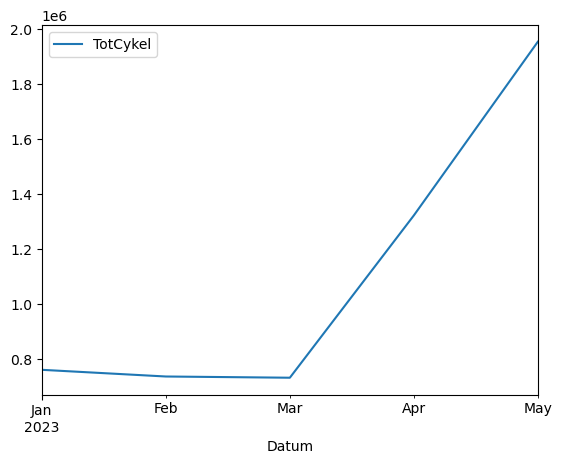

In [15]:
dm2.plot()

In [16]:
dm = dm.to_timestamp(freq='M')
dm

Datum
2023-01-31     761828.0
2023-02-28     737508.0
2023-03-31     733069.0
2023-04-30    1323503.0
2023-05-31    1955335.0
Freq: M, Name: TotCykel, dtype: float64

In [17]:
fig = px.line(dm, x=dm.index, y=dm)
fig.show()

## Passages per week

In [18]:
# sum by week
d = df_cleaned['TotCykel'].groupby(df_cleaned['Datum'].dt.to_period('W')).sum()
d.head()

Datum
2022-12-26/2023-01-01      4978.0
2023-01-02/2023-01-08     66420.0
2023-01-09/2023-01-15    199732.0
2023-01-16/2023-01-22    206627.0
2023-01-23/2023-01-29    199729.0
Freq: W-SUN, Name: TotCykel, dtype: float64

In [19]:
d.index

PeriodIndex(['2022-12-26/2023-01-01', '2023-01-02/2023-01-08',
             '2023-01-09/2023-01-15', '2023-01-16/2023-01-22',
             '2023-01-23/2023-01-29', '2023-01-30/2023-02-05',
             '2023-02-06/2023-02-12', '2023-02-13/2023-02-19',
             '2023-02-20/2023-02-26', '2023-02-27/2023-03-05',
             '2023-03-06/2023-03-12', '2023-03-13/2023-03-19',
             '2023-03-20/2023-03-26', '2023-03-27/2023-04-02',
             '2023-04-03/2023-04-09', '2023-04-10/2023-04-16',
             '2023-04-17/2023-04-23', '2023-04-24/2023-04-30',
             '2023-05-01/2023-05-07', '2023-05-08/2023-05-14',
             '2023-05-15/2023-05-21', '2023-05-22/2023-05-28',
             '2023-05-29/2023-06-04'],
            dtype='period[W-SUN]', name='Datum')

In [20]:
dw = d.to_timestamp(freq='W')
dw

Datum
2023-01-01      4978.0
2023-01-08     66420.0
2023-01-15    199732.0
2023-01-22    206627.0
2023-01-29    199729.0
2023-02-05    191176.0
2023-02-12    192450.0
2023-02-19    222204.0
2023-02-26    157997.0
2023-03-05    165268.0
2023-03-12    117929.0
2023-03-19    170347.0
2023-03-26    230362.0
2023-04-02    131210.0
2023-04-09    186101.0
2023-04-16    261768.0
2023-04-23    468808.0
2023-04-30    382802.0
2023-05-07    352018.0
2023-05-14    481501.0
2023-05-21    325172.0
2023-05-28    521431.0
2023-06-04    275213.0
Freq: W-SUN, Name: TotCykel, dtype: float64

In [21]:
dw.index

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05', '2023-03-12', '2023-03-19',
               '2023-03-26', '2023-04-02', '2023-04-09', '2023-04-16',
               '2023-04-23', '2023-04-30', '2023-05-07', '2023-05-14',
               '2023-05-21', '2023-05-28', '2023-06-04'],
              dtype='datetime64[ns]', name='Datum', freq='W-SUN')

In [22]:
# dir(px.colors.qualitative)

In [23]:
fig = px.line(dw, x=dw.index, y=d, color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.layout.template = 'plotly_dark'
fig.update_layout(
    title="Cykelpassager per vecka i Sthlm",
    xaxis_title="Vecka",
    yaxis_title="Antal"
)
fig.show()

In [24]:

df_week = d.to_frame().head()
df_week.head()

TotCykel
Datum                          
2022-12-26/2023-01-01    4978.0
2023-01-02/2023-01-08   66420.0
2023-01-09/2023-01-15  199732.0
2023-01-16/2023-01-22  206627.0
2023-01-23/2023-01-29  199729.0

In [25]:
# Sum by resample
df_week2 = df_cleaned.resample('W', on='Datum')['TotCykel'].sum()
df_week2.head()

Datum
2023-01-01      4978.0
2023-01-08     66420.0
2023-01-15    199732.0
2023-01-22    206627.0
2023-01-29    199729.0
Freq: W-SUN, Name: TotCykel, dtype: float64